# Unintentional Injuries Dataset

Summary of admissions to hospital and deaths in Scotland from unintentional injuries and assaults.


This dataset has 2 files: Admissions and Deaths. go to the source website to read more abotu it: https://www.opendata.nhs.scot/gl/dataset/unintentional-injuries

#### Your task is straightforward: 

1. Explore this dataset using Pandas.
2. Itentify and answer 5 questions in the notebook below

#### For EACH question should have following components:

- clear statement of the question (1 sentence)
- code which investigates your question in the dataset
- clear answer to the question (2-3 sentences)
- visualisation (can be very simple and can be anything: print, Pandas table, graph)

Remember these do not have to be complicated or long. It's just for practice. You will get feedback on your submission.

Next wednesday in during the labs each of you will present for 5-10 minutes what you achieved. You will share your screen and show everyone else what you prepared.

- just show your notebook, with questions, code and graphs (no need for slides or anything else)
- Between 5 and 10 minutes is not a long time, so you might chose to presend only 2-3 of your questions. Or show all of them but focus on your favourite. You decide what you'll do with your presenting time.
- this is not marked but you will get feedback about your code, questions and visualisation. This type of question-answering will be a part of the final assignment, so this feedback will be useful

For people who cannot attend the Wednesday session on week 3:

- complete this notebook with 5 questions as everyone else
- pick your favourite 2 questions and post the answer (code, writings and visualisation) in Learn Forum for "Formative Assignment". This will replace your presenting during the lab. Please do it by the end of last lab (Wednesday Week 3, 8pm). We will take a few days to give you feedback.

# Exploration

All steps that are required to familiarise with the given data.

In [1]:
## Libraries
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [12]:
## Datasets (from url)
# Loading the data of admissions in Scotland (added `convert_dtypes)
admissions_df_raw = pd.read_csv('https://www.opendata.nhs.scot/dataset/b0135993-3d8a-4f3b-afcf-e01f4d52137c/resource/aee43295-2a13-48f6-bf05-92769ca7c6cf/download/ui_admissions_2022.csv').convert_dtypes()
admissions_df_raw.to_csv('admissions_raw.csv', index=False)

# Loading the data of deaths in Scotland (added `convert_dtypes)
deaths_df_raw = pd.read_csv('https://www.opendata.nhs.scot/dataset/b0135993-3d8a-4f3b-afcf-e01f4d52137c/resource/89807e07-fc5f-4b5e-a077-e4cf59491139/download/ui_deaths_-2022-.csv').convert_dtypes()
deaths_df_raw.to_csv('deaths_raw.csv', index=False)

In [2]:
## Datasets (from local files)
# Loading the data of admissions in Scotland
admissions_df_raw = pd.read_csv('admissions_raw.csv').convert_dtypes()

# Loading the data of deaths in Scotland
deaths_df_raw = pd.read_csv('deaths_raw.csv').convert_dtypes()

/var/folders/vw/9_mzb7nj7lj9nbcxj880frj80000gp/T/ipykernel_5150/99234341.py:6: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  deaths_df_raw = pd.read_csv('deaths_raw.csv').convert_dtypes()


In [3]:
## Admission data
# Exploring the data
print('Before cleaning:')
print(admissions_df_raw.shape)
admissions_df_raw.info()

# Dropping columns
admissions_df = admissions_df_raw.drop(columns=['HBRQF', 'CAQF', 'AgeGroupQF', 
                                                       'SexQF', 'InjuryLocationQF',
                                                       'InjuryTypeQF'])
print('Columns:', ', '.join(admissions_df.columns.tolist()))

# Coercing data types
admissions_df[['FinancialYear', 'HBR', 'CA', 'AgeGroup', 'Sex', 'InjuryLocation',
               'InjuryType']] = admissions_df[['FinancialYear', 'HBR', 'CA', 'AgeGroup',
                                               'Sex', 'InjuryLocation',
                                               'InjuryType']].astype('category')
print('\nAfter cleaning:')
print(admissions_df.shape)
admissions_df.info()

# Showing the levels of the categorical variables
print('\nCategory levels:')
for col in admissions_df.select_dtypes(include='category').columns:
    print(f'Levels in {col}: {', '.join(admissions_df[col].cat.categories.tolist())}')

# Showing the cleaned dataset
admissions_df

Before cleaning:
(390177, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390177 entries, 0 to 390176
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   FinancialYear       390177 non-null  string
 1   HBR                 390177 non-null  string
 2   HBRQF               12150 non-null   string
 3   CA                  390177 non-null  string
 4   CAQF                12150 non-null   string
 5   AgeGroup            390177 non-null  string
 6   AgeGroupQF          44541 non-null   string
 7   Sex                 390177 non-null  string
 8   SexQF               132057 non-null  string
 9   InjuryLocation      390177 non-null  string
 10  InjuryLocationQF    80091 non-null   string
 11  InjuryType          390177 non-null  string
 12  InjuryTypeQF        43353 non-null   string
 13  NumberOfAdmissions  390177 non-null  Int64 
dtypes: Int64(1), string(13)
memory usage: 42.0 MB
Columns: FinancialYear, 

,FinancialYear,HBR,CA,AgeGroup,Sex,InjuryLocation,InjuryType,NumberOfAdmissions
0,2013/14,S92000003,S92000003,All,All,All,All Diagnoses,54974
1,2013/14,S92000003,S92000003,All,All,All,RTA,3069
2,2013/14,S92000003,S92000003,All,All,All,Poisoning,2865
3,2013/14,S92000003,S92000003,All,All,All,Falls,33558
4,2013/14,S92000003,S92000003,All,All,All,"Struck by, against",2453
...,...,...,...,...,...,...,...,...
390172,2022/23,S08000032,S12000029,75plus years,Female,Undisclosed,"Struck by, against",1
390173,2022/23,S08000032,S12000029,75plus years,Female,Undisclosed,Crushing,0
390174,2022/23,S08000032,S12000029,75plus years,Female,Undisclosed,Scalds,0
390175,2022/23,S08000032,S12000029,75plus years,Female,Undisclosed,Accidental Exposure,27


In [5]:
## Deaths data
# Exploring the data
print('Before cleaning:')
print(deaths_df_raw.shape)
deaths_df_raw.info()

# Dropping columns
deaths_df = deaths_df_raw.drop(columns=['HBRQF', 'CAQF', 'AgeGroupQF', 
                                               'SexQF', 'InjuryLocationQF',
                                               'InjuryTypeQF'])
print('Columns:', ', '.join(deaths_df.columns.tolist()))

# Coercing data types
deaths_df[['Year', 'HBR', 'CA', 'AgeGroup', 'Sex', 'InjuryLocation',
           'InjuryType']] = deaths_df[['Year', 'HBR', 'CA', 'AgeGroup',
                                           'Sex', 'InjuryLocation', 'InjuryType']].astype('category')
print('\nAfter cleaning:')
print(deaths_df.shape)
deaths_df.info()

# Mapping year column to financial year
deaths_df['Year'] = deaths_df['Year'].apply(lambda year: str(year) + '/' + str(int(str(year)[-2:]) + 1))
 
# Showing the levels of the categorical variables
print('\nCategory levels:')
for col in deaths_df.select_dtypes(include='category').columns:
    print(f'Levels in {col}: {', '.join(deaths_df[col].cat.categories.tolist())}')
    
# Showing the cleaned dataset
deaths_df

Before cleaning:
(197226, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197226 entries, 0 to 197225
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Year              197226 non-null  Int64 
 1   HBR               197226 non-null  string
 2   HBRQF             10215 non-null   string
 3   CA                182376 non-null  string
 4   CAQF              25065 non-null   string
 5   AgeGroup          197226 non-null  string
 6   AgeGroupQF        47403 non-null   string
 7   Sex               197226 non-null  string
 8   SexQF             76698 non-null   string
 9   InjuryLocation    197226 non-null  string
 10  InjuryLocationQF  57258 non-null   string
 11  InjuryType        197226 non-null  string
 12  InjuryTypeQF      21914 non-null   string
 13  NumberofDeaths    197226 non-null  Int64 
dtypes: Int64(2), string(12)
memory usage: 21.4 MB
Columns: Year, HBR, CA, AgeGroup, Sex, InjuryLocation, I

,Year,HBR,CA,AgeGroup,Sex,InjuryLocation,InjuryType,NumberofDeaths
0,2013/14,S92000003,S92000003,All,All,All,All,1664
1,2013/14,S92000003,S92000003,All,All,All,Land transport accidents,189
2,2013/14,S92000003,S92000003,All,All,All,Poisoning,510
3,2013/14,S92000003,S92000003,All,All,All,Falls,718
4,2013/14,S92000003,S92000003,All,All,All,"Struck by,against",2
...,...,...,...,...,...,...,...,...
197221,2022/23,S08000032,S12000050,75plus years,Female,Undisclosed,"Struck by,against",0
197222,2022/23,S08000032,S12000050,75plus years,Female,Undisclosed,Crushing,0
197223,2022/23,S08000032,S12000050,75plus years,Female,Undisclosed,Scalds,0
197224,2022/23,S08000032,S12000050,75plus years,Female,Undisclosed,Accidental exposure,1


In [8]:
## Combine datasets
# Mapping category levels
deaths_df['InjuryLocation'] = deaths_df['InjuryLocation'].replace({'Not applicable': 'Not Applicable'})#.astype('category')
print(deaths_df['InjuryLocation'].cat.categories)
deaths_df['InjuryType'] = deaths_df['InjuryType'].replace({'Accidental exposure': 'Accidental Exposure', 'All': 'All Diagnoses', 'Land transport accidents': 'RTA', 'Struck by,against': 'Struck by, against'})
print(deaths_df['InjuryType'].cat.categories)

# Merging the two datasets
admissions_deaths_df = pd.merge(admissions_df, deaths_df, left_on=['FinancialYear', 'HBR', 'CA', 'AgeGroup', 'Sex', 'InjuryLocation', 'InjuryType'], right_on=['Year', 'HBR', 'CA', 'AgeGroup', 'Sex', 'InjuryLocation', 'InjuryType'], how='left')
admissions_deaths_df.drop(columns=['Year'], inplace=True)
admissions_deaths_df.rename(columns={'NumberofDeaths': 'NumberOfDeaths'}, inplace=True)
admissions_deaths_df_nona = admissions_deaths_df[admissions_deaths_df['NumberOfDeaths'].isna() == False]
admissions_deaths_df_nona = admissions_deaths_df_nona.reset_index(drop=True)
print(admissions_deaths_df_nona.info())
admissions_deaths_df_nona

Index(['All', 'Home', 'Not Applicable', 'Other', 'Undisclosed'], dtype='string')
Index(['Accidental Exposure', 'All Diagnoses', 'Crushing', 'Falls', 'RTA',
       'Other', 'Poisoning', 'Scalds', 'Struck by, against'],
      dtype='string')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182160 entries, 0 to 182159
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   FinancialYear       182160 non-null  category
 1   HBR                 182160 non-null  category
 2   CA                  182160 non-null  category
 3   AgeGroup            182160 non-null  category
 4   Sex                 182160 non-null  category
 5   InjuryLocation      182160 non-null  category
 6   InjuryType          182160 non-null  category
 7   NumberOfAdmissions  182160 non-null  Int64   
 8   NumberOfDeaths      182160 non-null  Int64   
dtypes: Int64(2), category(7)
memory usage: 4.3 MB
None


/var/folders/vw/9_mzb7nj7lj9nbcxj880frj80000gp/T/ipykernel_26586/329540805.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  deaths_df['InjuryLocation'] = deaths_df['InjuryLocation'].replace({'Not applicable': 'Not Applicable'})#.astype('category')
/var/folders/vw/9_mzb7nj7lj9nbcxj880frj80000gp/T/ipykernel_26586/329540805.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  deaths_df['InjuryType'] = deaths_df['InjuryType'].replace({'Accidental exposure': 'Accidental Exposure', 'All': 'All Diagnoses', 'Land transport accidents': 'RTA', 'Struck by,against': 'Struck

,FinancialYear,HBR,CA,AgeGroup,Sex,InjuryLocation,InjuryType,NumberOfAdmissions,NumberOfDeaths
0,2013/14,S92000003,S92000003,All,All,All,All Diagnoses,54974,1664
1,2013/14,S92000003,S92000003,All,All,All,RTA,3069,189
2,2013/14,S92000003,S92000003,All,All,All,Poisoning,2865,510
3,2013/14,S92000003,S92000003,All,All,All,Falls,33558,718
4,2013/14,S92000003,S92000003,All,All,All,"Struck by, against",2453,2
...,...,...,...,...,...,...,...,...,...
182155,2022/23,S08000032,S12000029,75plus years,Female,Undisclosed,"Struck by, against",1,0
182156,2022/23,S08000032,S12000029,75plus years,Female,Undisclosed,Crushing,0,0
182157,2022/23,S08000032,S12000029,75plus years,Female,Undisclosed,Scalds,0,0
182158,2022/23,S08000032,S12000029,75plus years,Female,Undisclosed,Accidental Exposure,27,1


In [31]:
## Drop aggregated levels
# Dropping the aggregated rows from columns AgeGroup, Sex, InjuryLocation, InjuryType
admissions_deaths_df_nona_noag = admissions_deaths_df_nona[
            (admissions_deaths_df_nona['AgeGroup'] != 'All') & 
            (admissions_deaths_df_nona['Sex'] != 'All') & 
            (admissions_deaths_df_nona['InjuryLocation'] != 'All') & 
            (admissions_deaths_df_nona['InjuryType'] != 'All Diagnoses')]
admissions_deaths_df_nona_noag

,FinancialYear,HBR,CA,AgeGroup,Sex,InjuryLocation,InjuryType,NumberOfAdmissions,NumberOfDeaths
181,2013/14,S92000003,S92000003,0-4 years,Male,Home,RTA,0,0
182,2013/14,S92000003,S92000003,0-4 years,Male,Home,Poisoning,292,0
183,2013/14,S92000003,S92000003,0-4 years,Male,Home,Falls,490,1
184,2013/14,S92000003,S92000003,0-4 years,Male,Home,"Struck by, against",100,0
185,2013/14,S92000003,S92000003,0-4 years,Male,Home,Crushing,91,0
...,...,...,...,...,...,...,...,...,...
182155,2022/23,S08000032,S12000029,75plus years,Female,Undisclosed,"Struck by, against",1,0
182156,2022/23,S08000032,S12000029,75plus years,Female,Undisclosed,Crushing,0,0
182157,2022/23,S08000032,S12000029,75plus years,Female,Undisclosed,Scalds,0,0
182158,2022/23,S08000032,S12000029,75plus years,Female,Undisclosed,Accidental Exposure,27,1


# Question A

**Question**: What injury type has the highest number of hospital admissions in Scotland in the last decade (2013 - 2023)?

In [19]:
## Visualize the results
# Highest admissions
print('Hospital admission reasons:\n', 
      admissions_deaths_df_nona_noag.groupby('InjuryType', observed=False)['NumberOfAdmissions'].sum().sort_values(ascending=False))

Hospital admission reasons:
 InjuryType
Falls                  584073
Other                  115021
Accidental Exposure     53172
Poisoning               50206
RTA                     42752
Struck by, against      28478
Crushing                12569
Scalds                   5713
All Diagnoses               0
Name: NumberOfAdmissions, dtype: Int64


<Axes: xlabel='InjuryType'>

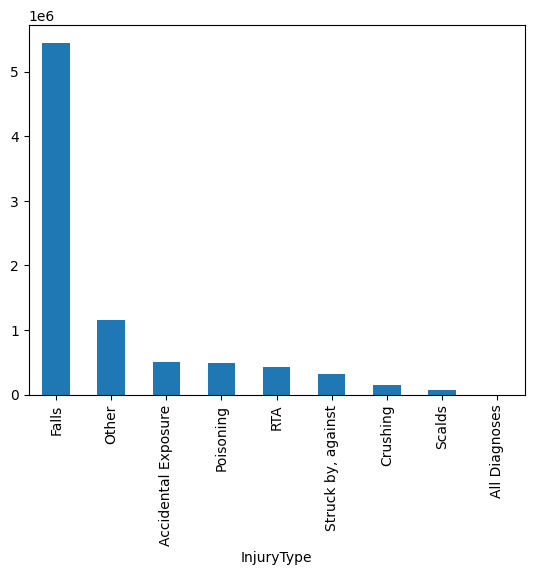

In [20]:
## Visualize the results
# Plotting a bar chart for the number of admissions per injury type
admissions_deaths_df_nona[admissions_deaths_df_nona['InjuryType'] != 'All Diagnoses'].groupby('InjuryType', observed=False)['NumberOfAdmissions'].sum().sort_values(ascending=False).plot(kind='bar')

**Answer**: The most often reason for hospital admissions are **falls** (584073) in the year 2013 to 2023 in Scotland. It is followed by **other** (115021) injuries.

# Question B

**Question**: What injury type has the highest number of deaths in Scotland from 2013 to 2023?


Death resons:
 InjuryType
Poisoning              19354
Falls                  18179
RTA                     3404
Other                   3139
Accidental Exposure     2003
Struck by, against        55
Crushing                  28
Scalds                    28
All Diagnoses              0
Name: NumberOfDeaths, dtype: Int64


<Axes: xlabel='InjuryType'>

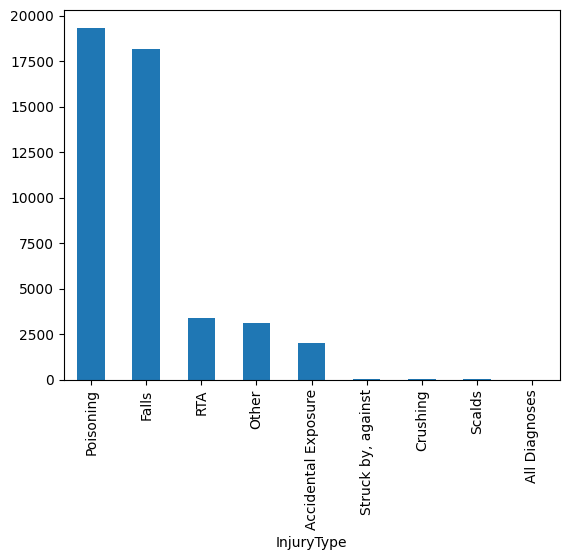

In [23]:
## Visualize the results
# Printing number of deaths
print('\nDeath resons:\n', 
      admissions_deaths_df_nona_noag.groupby('InjuryType', observed=False)['NumberOfDeaths'].sum().sort_values(ascending=False))

# Plotting a bar chart for the number of deaths per injury type
admissions_deaths_df_nona_noag.groupby('InjuryType', observed=False)['NumberOfDeaths'].sum().sort_values(ascending=False).plot(kind='bar')

**Answer**: From 2013 to 2023 poisining is the most common injury type which leads to death in Scotland (**19354**) in the last decade. Falls has the second highest number of deaths (**18179**). Other reasons are less common to lead to death.

# Question C

**Question**: How strong are the correlations for all injury types regarding the number of hospital admissions and the number of deaths?

In [24]:
# Showing the correlation between the number of admissions and the number of deaths
matrix = admissions_deaths_df_nona_noag.groupby('InjuryType', observed=False)[['NumberOfAdmissions', 'NumberOfDeaths']].sum().sort_values(by=['NumberOfAdmissions', 'NumberOfDeaths'], ascending=False)

# Dropping `All Diagnoses` from the dataset
matrix = matrix.drop('All Diagnoses')
matrix.corr()

,NumberOfAdmissions,NumberOfDeaths
NumberOfAdmissions,1.000000,0.638621
NumberOfDeaths,0.638621,1.000000


**Answer**: There is a strong possitive correlation between the number of hospital admissions and the number of deaths (0.64). This means that the more admissions there are, the more deaths are to be expected, which is generally expected.

# Question D

**Question**: Are there significant differences between the percentage of deaths in relation to hospital admissions for the oldest age group (75+) compared to the youngest age group (0-4) in the last decade?

In [25]:
## Visualize the results
print(admissions_deaths_df_nona_noag[admissions_deaths_df_nona_noag['AgeGroup'] == '0-4 years']['NumberOfDeaths'].sum() / admissions_deaths_df_nona_noag[admissions_deaths_df_nona_noag['AgeGroup'] == '0-4 years']['NumberOfAdmissions'].sum() * 100)
print(admissions_deaths_df_nona_noag[admissions_deaths_df_nona_noag['AgeGroup'] == '75plus years']['NumberOfDeaths'].sum() / admissions_deaths_df_nona_noag[admissions_deaths_df_nona_noag['AgeGroup'] == '75plus years']['NumberOfAdmissions'].sum() * 100)

0.7942940508996595
5.185616947721745


**Answer**: The oldest age group (75+) has a higher chance of death with **5.19%** when admitted into a hospital, compared to the youngest age group (0-4) with just **0.8%**. This seems to be a significant difference for the last decade.

# Question E

**Question**: Are there differences in the number of hospital admissions between the female and male population?

Figures: 456206 435778
Rate: 1.046877079613932


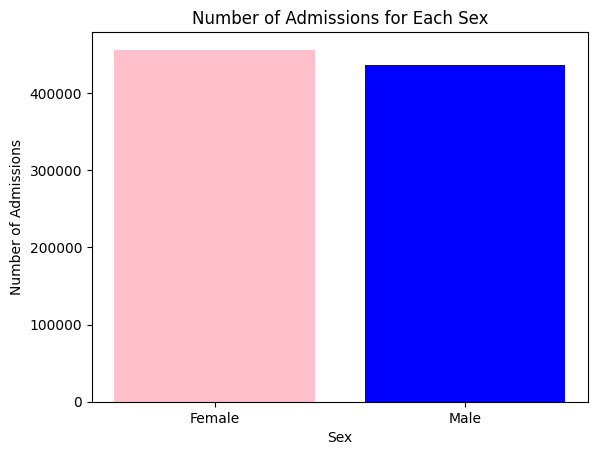

In [30]:
## Visualize the results
matrix_sex = {'Female': admissions_deaths_df_nona_noag[admissions_deaths_df_nona_noag['Sex'] == 'Female']['NumberOfAdmissions'].sum(),
              'Male': admissions_deaths_df_nona_noag[admissions_deaths_df_nona_noag['Sex'] == 'Male']['NumberOfAdmissions'].sum()}
labels = list(matrix_sex.keys())
values = list(matrix_sex.values())
print('Figures:', values[0], values[1])
print('Rate:', values[0] / values[1])

# Plotting results
plt.bar(labels, values, color=['pink', 'blue'])

plt.xlabel('Sex')
plt.ylabel('Number of Admissions')
plt.title('Number of Admissions for Each Sex')
plt.show()

**Answer**: There is a slight difference in the number of hospital admissions for the sexes in the last decade in Scotland.
Women have a higher number of hospital admissions (**456206**) which is **1.05** times higher than that of men (**435778**).

# Summary

The dataset was explored and 5 questions were asked and answered.